### Cargar Datos e importar librerias

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import math
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar los datos
file_path = "trafico_asturies.csv"
df = pd.read_csv(file_path)
df_asturies = pd.read_csv("trafico_asturies.csv")

### Mostrar datos

In [2]:
df.head()

street   latitude  longitude  currentSpeed  freeFlowSpeed  \
0  Fuso de la Reina- Tuñón  43.492229  -5.660493            33             33   
1      Plaza de Olof Palme  39.472714  -0.349138            31             31   
2          Camin del Peñón  43.458737  -5.756044           100            100   
3           Caleya del Río  43.456455  -5.607828            47             47   
4         Cerro la Muralla  20.378618 -99.958288            33             33   

   currentTravelTime  freeFlowTravelTime  confidence  roadClosure  
0                 93                  93         1.0        False  
1                 48                  48         1.0        False  
2                636                 636         1.0        False  
3               1724                1724         1.0        False  
4                395                 395         1.0        False

### Datos estadísticos e información

In [3]:
print(df.columns)
print(df.shape)
print(df.index)
print(df.info())
df.describe()

Index(['street', 'latitude', 'longitude', 'currentSpeed', 'freeFlowSpeed',
       'currentTravelTime', 'freeFlowTravelTime', 'confidence', 'roadClosure'],
      dtype='object')
(4006, 9)
RangeIndex(start=0, stop=4006, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   street              4006 non-null   object 
 1   latitude            4006 non-null   float64
 2   longitude           4006 non-null   float64
 3   currentSpeed        4006 non-null   int64  
 4   freeFlowSpeed       4006 non-null   int64  
 5   currentTravelTime   4006 non-null   int64  
 6   freeFlowTravelTime  4006 non-null   int64  
 7   confidence          4006 non-null   float64
 8   roadClosure         4006 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 254.4+ KB
None


latitude    longitude  currentSpeed  freeFlowSpeed  \
count  4006.000000  4006.000000   4006.000000    4006.000000   
mean     39.440823   -10.523824     48.240389      50.214428   
std      14.953300    19.625353     25.816889      24.176065   
min     -54.823153  -122.116574      4.000000       4.000000   
25%      43.363449    -5.757760     28.000000      32.000000   
50%      43.503472    -5.685010     44.000000      44.000000   
75%      43.535469    -5.649046     58.000000      59.000000   
max      47.351006   101.437337    130.000000     130.000000   

       currentTravelTime  freeFlowTravelTime   confidence  
count        4006.000000         4006.000000  4006.000000  
mean          573.252871          543.914129     0.991679  
std           470.357784          469.443937     0.036815  
min             1.000000            1.000000     0.507184  
25%           231.000000          216.000000     1.000000  
50%           463.000000          388.000000     1.000000  
75%           786.000000          731.000000     1.000000  
max          8842.000000         8842.000000     1.000000

In [4]:
df.describe(include='object')

street
count                     4006
unique                    4006
top     Camín de Las Orquídeas
freq                         1

### Ver si hay filas duplicadas

In [5]:
# Contar el número de filas duplicadas
num_duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


In [7]:
# Encontrar filas duplicadas
filas_duplicadas = df[df.duplicated()]

### Ver si hay datos faltantes

In [9]:
def valores_faltantes(data):
  total = data.isnull().sum()
  porcentaje = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
  types = []
  for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
  tt['Tipos'] = types
  return np.transpose(tt)

valores_faltantes(df)

street latitude longitude currentSpeed freeFlowSpeed  \
Total            0        0         0            0             0   
Porcentaje     0.0      0.0       0.0          0.0           0.0   
Tipos       object  float64   float64        int64         int64   

           currentTravelTime freeFlowTravelTime confidence roadClosure  
Total                      0                  0          0           0  
Porcentaje               0.0                0.0        0.0         0.0  
Tipos                  int64              int64    float64        bool

In [10]:
df['street'].unique()

array(['Fuso de la Reina- Tuñón', 'Plaza de Olof Palme',
       'Camin del Peñón', ..., 'Avenida de Luis Braille',
       'Camín de Morán', 'Camín de Las Orquídeas'], dtype=object)

### Análisis Univariante

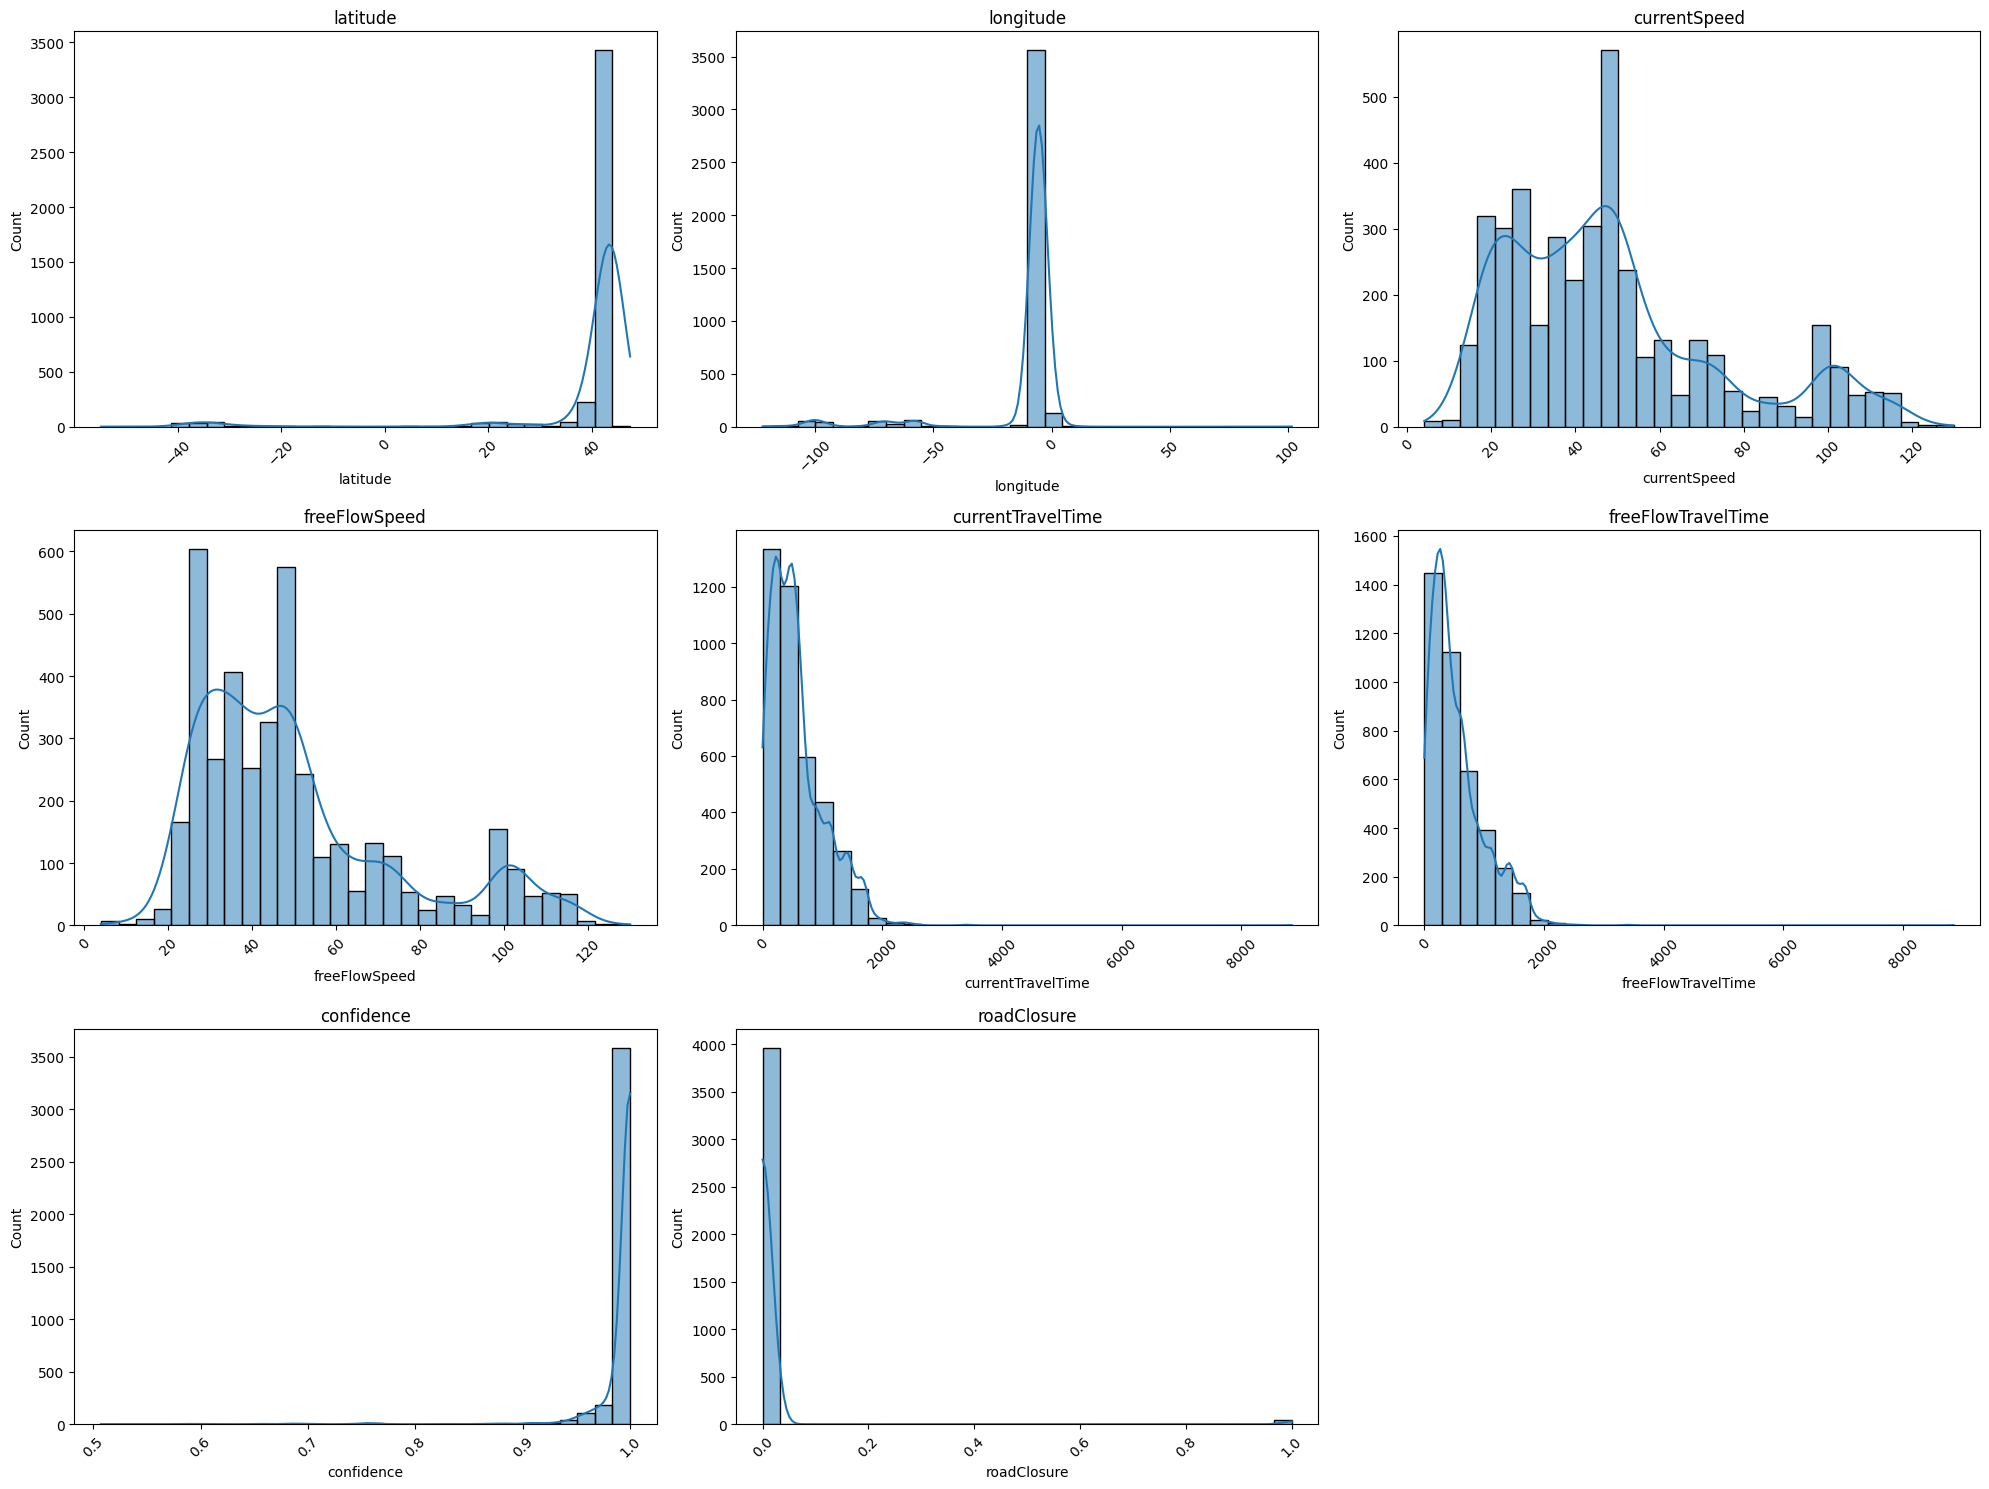

In [54]:
def analisis_univariante(data, cols=3, width=20, height=15):
    fig = plt.figure(figsize=(width, height))
    rows = math.ceil((data.shape[1] - 1) / cols)
    plot_index = 1

    for column in data.columns:
        if column == 'street':
            continue  # Saltar columna

        ax = fig.add_subplot(rows, cols, plot_index)
        plot_index += 1
        ax.set_title(column)

        if data[column].dtype == 'object':
            top_categories = data[column].value_counts().index[:10]
            sns.countplot(data=data[data[column].isin(top_categories)],
                          y=column,
                          ax=ax,
                          palette='viridis',
                          order=top_categories)
            plt.xticks(rotation=45)
        else:
            sns.histplot(data[column], ax=ax, kde=True, bins=30)
            plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame existente
analisis_univariante(df)

### Comparar Velocidad de Vía con Velocidad del tráfico

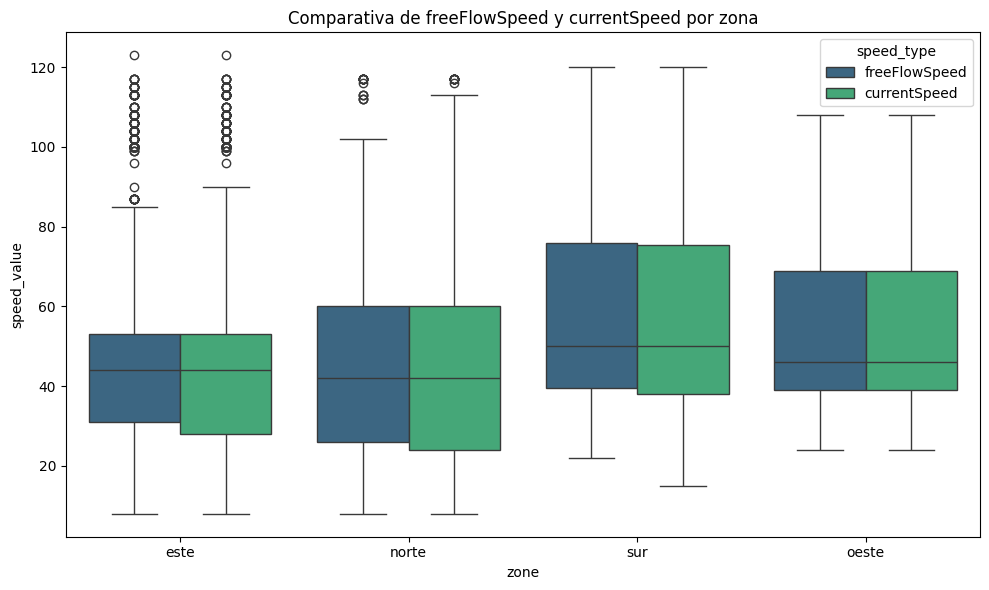

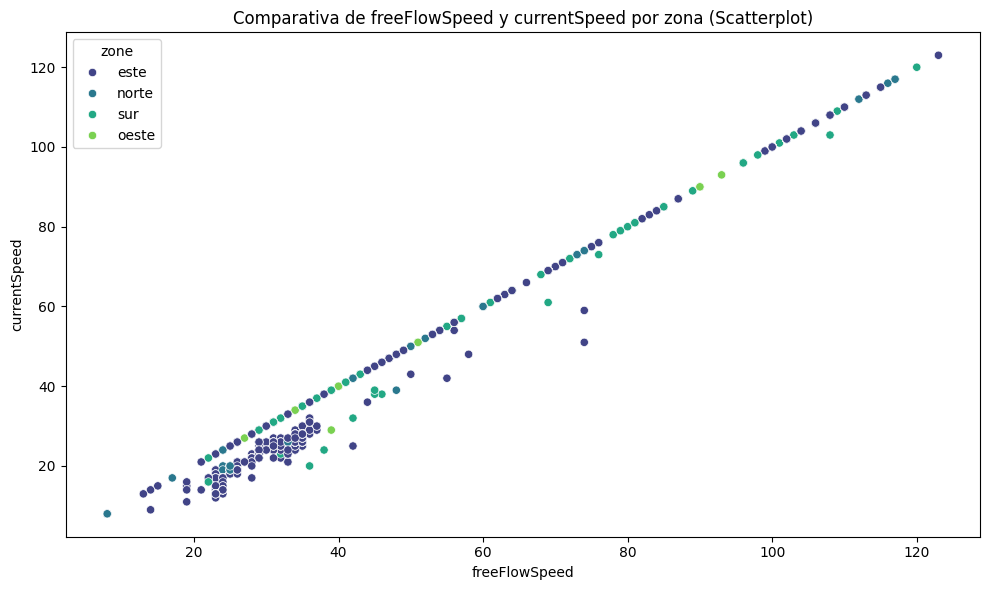

In [69]:
def get_zone(lat, lon, center_lat=43.36, center_lon=-5.87):
    lat_diff = lat - center_lat
    lon_diff = lon - center_lon
    # Asignamos la zona según la componente con mayor diferencia
    if abs(lat_diff) > abs(lon_diff):
        return "norte" if lat_diff > 0 else "sur"
    else:
        return "este" if lon_diff > 0 else "oeste"

# Actualizar la columna 'zone' usando el DataFrame ya cargado con datos de Asturias
df["zone"] = df.apply(lambda row: get_zone(row["latitude"], row["longitude"]), axis=1)

# Unir (melt) las columnas de velocidad para compararlas en un mismo gráfico
df_melted = df.melt(
    id_vars=["zone"],
    value_vars=["freeFlowSpeed", "currentSpeed"],
    var_name="speed_type",
    value_name="speed_value"
)

# Diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="zone", y="speed_value", hue="speed_type", palette="viridis")
plt.title("Comparativa de freeFlowSpeed y currentSpeed por zona")
plt.tight_layout()
plt.show()

# Scatterplot comparando freeFlowSpeed y currentSpeed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="freeFlowSpeed", y="currentSpeed", hue="zone", palette="viridis")
plt.title("Comparativa de freeFlowSpeed y currentSpeed por zona (Scatterplot)")
plt.tight_layout()
plt.show()


### Comparar tiempo de viaje normal y actual

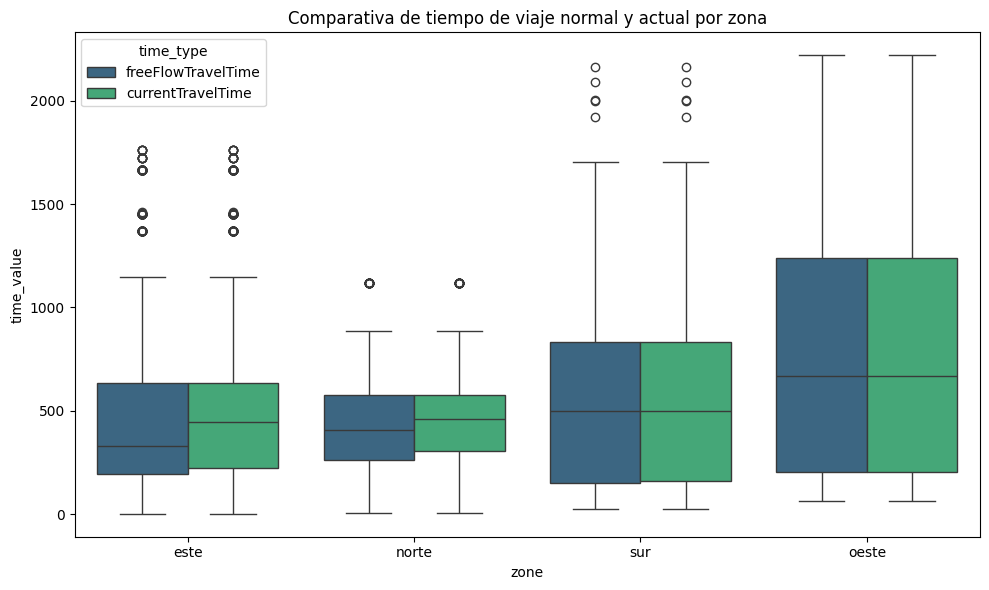

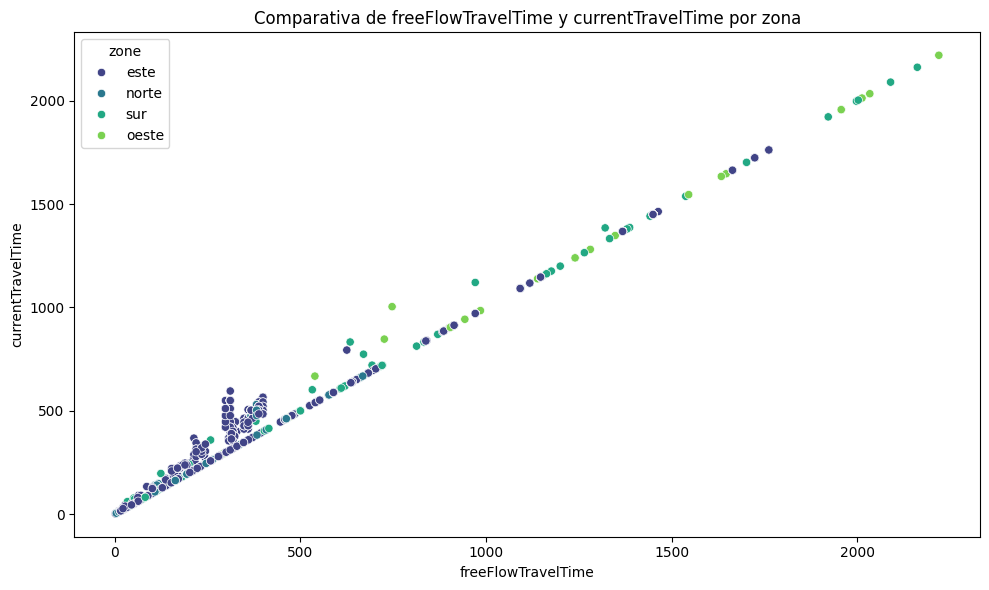

In [70]:
def get_zone(lat, lon, center_lat=43.36, center_lon=-5.87):
    lat_diff = lat - center_lat
    lon_diff = lon - center_lon
    # Asignamos la zona según la componente con mayor diferencia
    if abs(lat_diff) > abs(lon_diff):
        return "norte" if lat_diff > 0 else "sur"
    else:
        return "este" if lon_diff > 0 else "oeste"

# Cargar CSV
df = pd.read_csv("trafico_gijon.csv")

# Crear la columna 'zone'
df["zone"] = df.apply(lambda row: get_zone(row["latitude"], row["longitude"]), axis=1)

# Unir (melt) las columnas de tiempo para compararlas en un mismo gráfico
df_melted = df.melt(id_vars=["zone"], 
                    value_vars=["freeFlowTravelTime", "currentTravelTime"], 
                    var_name="time_type", 
                    value_name="time_value")

# Graficar diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="zone", y="time_value", hue="time_type", palette="viridis")
plt.title("Comparativa de tiempo de viaje normal y actual por zona")
plt.tight_layout()
plt.show()

# Scatterplot comparando freeFlowSpeed y currentSpeed, coloreado por zona
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="freeFlowTravelTime", y="currentTravelTime", hue="zone", palette="viridis")
plt.title("Comparativa de freeFlowTravelTime y currentTravelTime por zona")
plt.tight_layout()
plt.show()

### Comparar Velocidad y tiempo

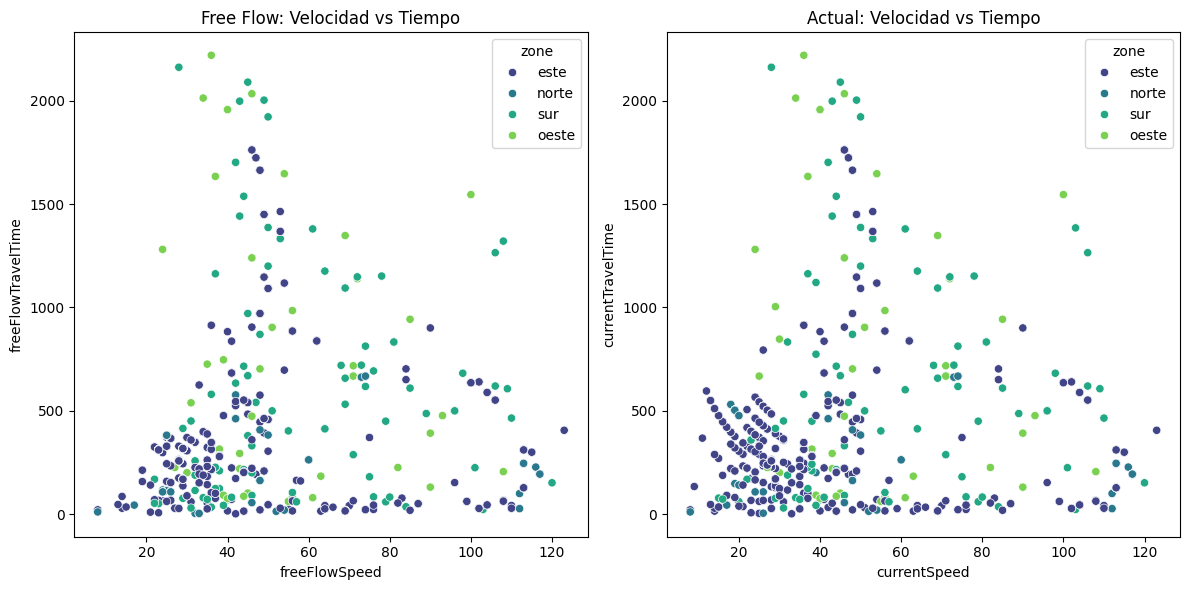

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_zone(lat, lon, center_lat=43.36, center_lon=-5.87):
    lat_diff = lat - center_lat
    lon_diff = lon - center_lon
    if abs(lat_diff) > abs(lon_diff):
        return "norte" if lat_diff > 0 else "sur"
    else:
        return "este" if lon_diff > 0 else "oeste"

df = pd.read_csv("trafico_gijon.csv")

df["zone"] = df.apply(lambda row: get_zone(row["latitude"], row["longitude"]), axis=1)

plt.figure(figsize=(12, 6))

# Subplot 1: Free flow
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="freeFlowSpeed", y="freeFlowTravelTime", hue="zone", palette="viridis")
plt.title("Free Flow: Velocidad vs Tiempo")

# Subplot 2: Actual
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="currentSpeed", y="currentTravelTime", hue="zone", palette="viridis")
plt.title("Actual: Velocidad vs Tiempo")

plt.tight_layout()
plt.show()

### Mapa de tráfico en Asturias

In [66]:
import pandas as pd
import folium

# Carga el CSV
df = pd.read_csv("trafico_asturies.csv")

# Filtra solo las coordenadas dentro de un rango razonable para Asturias
df = df[
    (df["latitude"].between(43.1, 43.7)) &
    (df["longitude"].between(-7.0, -5.0))
]

# Función para asignar color según nivel de tráfico (velocidad actual / velocidad libre)
def get_color_ratio(speed, free_speed):
    ratio = speed / free_speed if free_speed else 0
    if ratio < 0.4:
        return "red"
    elif ratio < 0.7:
        return "orange"
    elif ratio < 1:
        return "red"
    else:
        return "green"

# Crea el mapa centrado aproximadamente en Asturias
mapa = folium.Map(location=[43.36, -5.87], zoom_start=8)

# Agrega marcadores con colores según tráfico y marcadores especiales para calles cerradas
for _, row in df.iterrows():
    color = "black" if row["roadClosure"] else get_color_ratio(row["currentSpeed"], row["freeFlowSpeed"])
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        popup=row["street"]
    ).add_to(mapa)

mapa.save("mapa_trafico_asturies.html")
mapa

### Aplicar PCA, escalar datos y eliminar outliers

In [23]:
# Seleccionar columnas relevantes para clustering
X = df[['latitude', 'longitude', 'currentSpeed', 'freeFlowSpeed', 'currentTravelTime', 'freeFlowTravelTime']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Isolation Forest para eliminar outliers antes del clustering
iso_forest = IsolationForest(contamination=0.03, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled)
df['anomaly'] = anomalies
X_filtered = X_scaled[df['anomaly'] == 1]

# Aplicar PCA para reducir dimensiones antes de clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)
df_filtered = df[df['anomaly'] == 1].copy()
df_filtered[['PCA1', 'PCA2']] = X_pca

### Agrupación con clusters (KMEANS)

Mejor n_clusters=3, Silhouette=0.5567
Silhouette Score (K-Means): 0.46
          latitude  longitude  currentSpeed  freeFlowSpeed  currentTravelTime  \
cluster                                                                         
0        41.836152  -7.128829     55.418090      55.890452         424.020101   
1        42.875483  -6.330429    101.648594     101.740964         421.491968   
2        38.071019 -12.603654     46.862944      47.480964        1245.294416   
3        41.699659  -8.231409     26.981297      31.187032         324.202618   

         freeFlowTravelTime  confidence  anomaly      PCA1      PCA2  cluster  \
cluster                                                                         
0                422.005025    0.998506      1.0  0.276045 -0.437382      0.0   
1                421.411647    1.000000      1.0  2.775848 -1.171068      1.0   
2               1220.129442    0.997123      1.0  0.492620  2.065464      2.0   
3                268.108479    0.9822

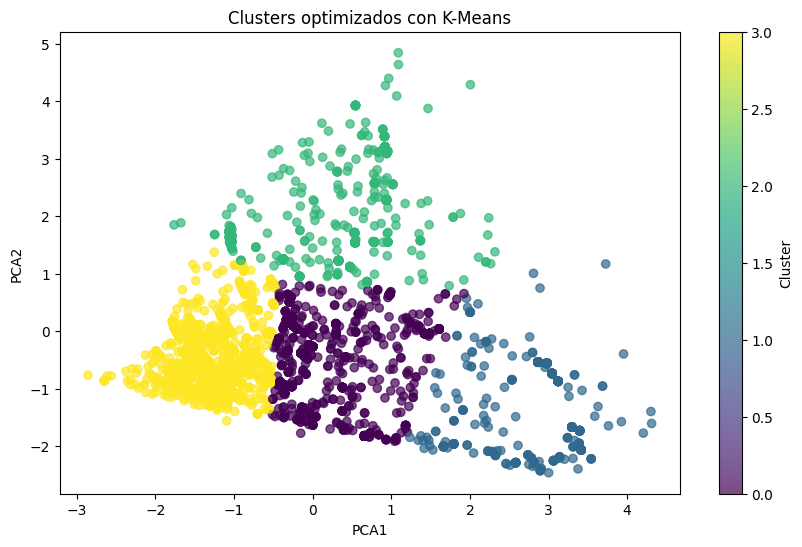

In [33]:
scores = []
for n_c in range(2, 11):
    kmeans_temp = KMeans(n_clusters=n_c, random_state=42, n_init=20)
    labels_temp = kmeans_temp.fit_predict(X_pca)
    score_temp = silhouette_score(X_pca, labels_temp)
    scores.append((n_c, score_temp))

best_n, best_score = max(scores, key=lambda x: x[1])
print(f"Mejor n_clusters={best_n}, Silhouette={best_score:.4f}")

kmeans = KMeans(n_clusters=best_n, random_state=42, n_init=20)
df_filtered['cluster_opt'] = kmeans.fit_predict(X_pca)

# Evaluar K-Means con Silhouette Score
silhouette_kmeans = silhouette_score(X_pca, df_filtered['cluster'])
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.2f}")

# Ver lo que representan los clusters
numeric_cols = df_filtered.select_dtypes(include=['number']).columns
print(df_filtered.groupby("cluster")[numeric_cols].mean())

# Visualizar los clusters en PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_filtered['PCA1'], df_filtered['PCA2'], c=df_filtered['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Clusters optimizados con K-Means")
plt.show()

In [35]:
# muestra las calles agrupadas
df_filtered.groupby("cluster")["street"].unique()

cluster
0    [Calle las Escuelas, Calle Rey Pelayo, Carrete...
1    [Camin del Peñón, Travesía de La Vega, Calle J...
2    [Caleya del Río, Camín de Riusecu, Entrada apa...
3    [Fuso de la Reina- Tuñón, Plaza de Olof Palme,...
Name: street, dtype: object

### Agrupación con clusters (DBSCAN)

Mejores parámetros DBSCAN: eps=0.4, min_samples=10 (Silhouette=0.37)
Silhouette Score (DBSCAN): 0.37
          latitude  longitude  currentSpeed  freeFlowSpeed  currentTravelTime  \
cluster                                                                         
0        41.836152  -7.128829     55.418090      55.890452         424.020101   
1        42.875483  -6.330429    101.648594     101.740964         421.491968   
2        38.071019 -12.603654     46.862944      47.480964        1245.294416   
3        41.699659  -8.231409     26.981297      31.187032         324.202618   

         freeFlowTravelTime  confidence  anomaly      PCA1      PCA2  cluster  \
cluster                                                                         
0                422.005025    0.998506      1.0  0.276045 -0.437382      0.0   
1                421.411647    1.000000      1.0  2.775848 -1.171068      1.0   
2               1220.129442    0.997123      1.0  0.492620  2.065464      2.0   
3      

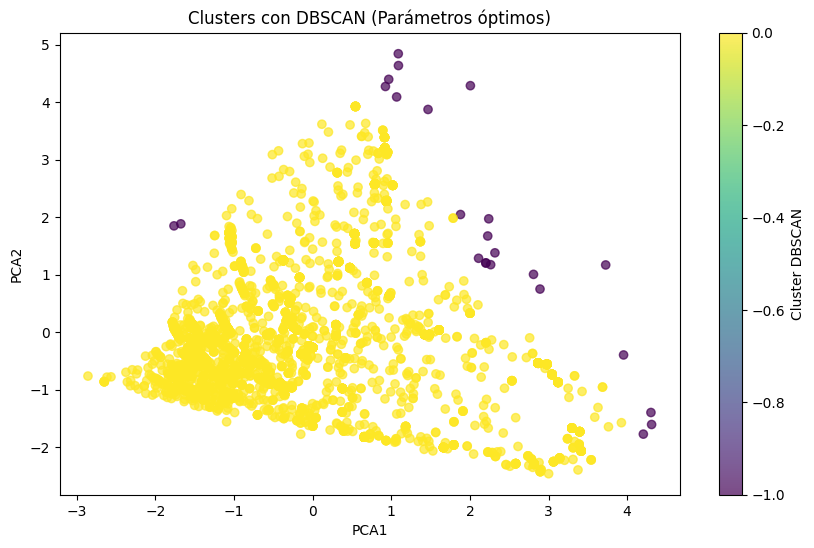

In [34]:
# Probar varios valores de eps y min_samples para mejorar la silueta con DBSCAN
best_score = -1
best_params = (0.4, 10)

for eps_test in [0.2, 0.25, 0.3, 0.35, 0.4]:
    for min_samp_test in [5, 10, 15, 20]:
        dbscan_temp = DBSCAN(eps=eps_test, min_samples=min_samp_test)
        labels_temp = dbscan_temp.fit_predict(X_pca)
        # Solo evaluamos la silueta si hay más de un cluster
        if len(set(labels_temp)) > 1:
            score_temp = silhouette_score(X_pca, labels_temp)
            if score_temp > best_score:
                best_score = score_temp
                best_params = (eps_test, min_samp_test)

print(f"Mejores parámetros DBSCAN: eps={best_params[0]}, min_samples={best_params[1]} (Silhouette={best_score:.2f})")

dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
df_filtered['dbscan_cluster'] = dbscan.fit_predict(X_pca)
silhouette_dbscan = silhouette_score(X_pca, df_filtered['dbscan_cluster'])
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.2f}")

# Ver promedios por cluster (usando la columna 'cluster' previa como referencia si se necesita)
print(df_filtered.groupby("cluster")[numeric_cols].mean())

# Visualizar Clustering DBSCAN
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['PCA1'], df_filtered['PCA2'], c=df_filtered['dbscan_cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster DBSCAN")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Clusters con DBSCAN (Parámetros óptimos)")
plt.show()

In [36]:
# muestra las calles agrupadas
df_filtered.groupby("dbscan_cluster")["street"].unique()

dbscan_cluster
-1    [Calle Joaquín Costa, Paseo de Poniente - Fome...
 0    [Fuso de la Reina- Tuñón, Plaza de Olof Palme,...
Name: street, dtype: object

### Detectar anomalías en tráfico

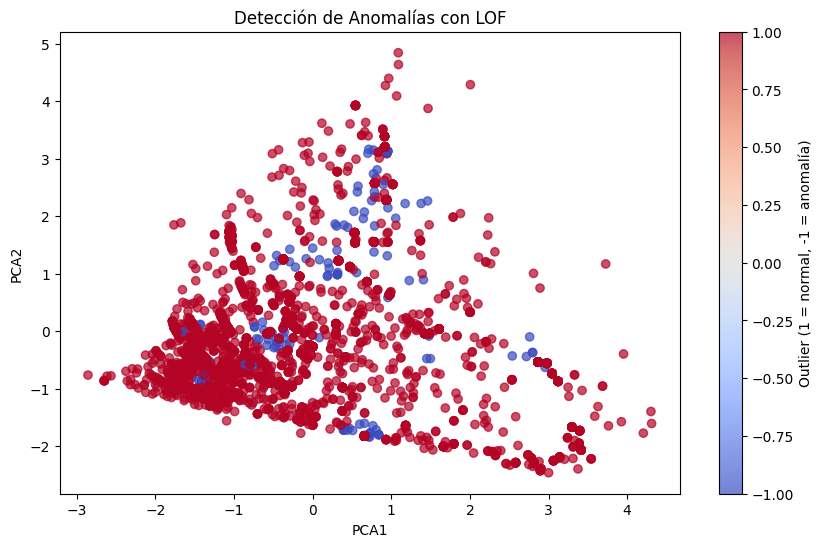

In [ ]:
# Aplicar Local Outlier Factor para detección de anomalías
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_filtered['lof_outlier'] = lof.fit_predict(X_pca)

# Visualizar anomalías detectadas
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['PCA1'], df_filtered['PCA2'], c=df_filtered['lof_outlier'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Outlier (1 = normal, -1 = anomalía)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Detección de Anomalías con LOF")
plt.show()

In [37]:
# mostrar calles con anomalias
df_filtered[df_filtered['lof_outlier'] == -1]['street']

62                             Calle Ribera
66                   Calle Alejandro Casona
73                   Camín de San Llorienzu
74                          Calle Almacenes
81                    Calle Tomás Zarracina
                       ...                 
3887                       Calle Los Corzos
3900                  Carbayera de Caldones
3970                         Calle La Salle
3990                   Calle Nelson Mandela
3997    Calle Obdulia Alvarez "La Busdonga"
Name: street, Length: 194, dtype: object

### Ver las anomalías en el mapa

Empty DataFrame
Columns: [latitude, longitude, currentSpeed, freeFlowSpeed, currentTravelTime]
Index: []


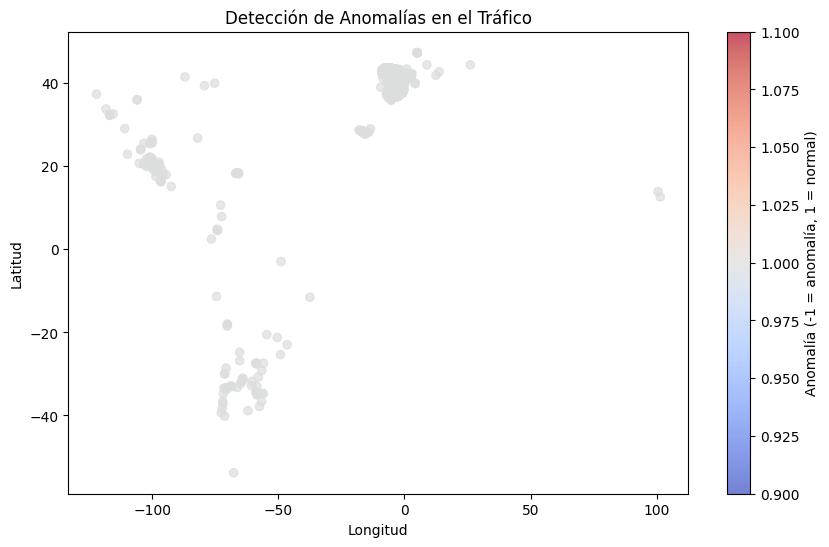

In [27]:
# Ver solo las anomalías detectadas (-1 significa anomalía)
anomalies = df_filtered[df_filtered['anomaly'] == -1]

# Mostrar algunas anomalías detectadas
print(anomalies[['latitude', 'longitude', 'currentSpeed', 'freeFlowSpeed', 'currentTravelTime']])

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], c=df_filtered['anomaly'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Anomalía (-1 = anomalía, 1 = normal)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Detección de Anomalías en el Tráfico")
plt.show()

### Agrupaciones de calles por velocidad

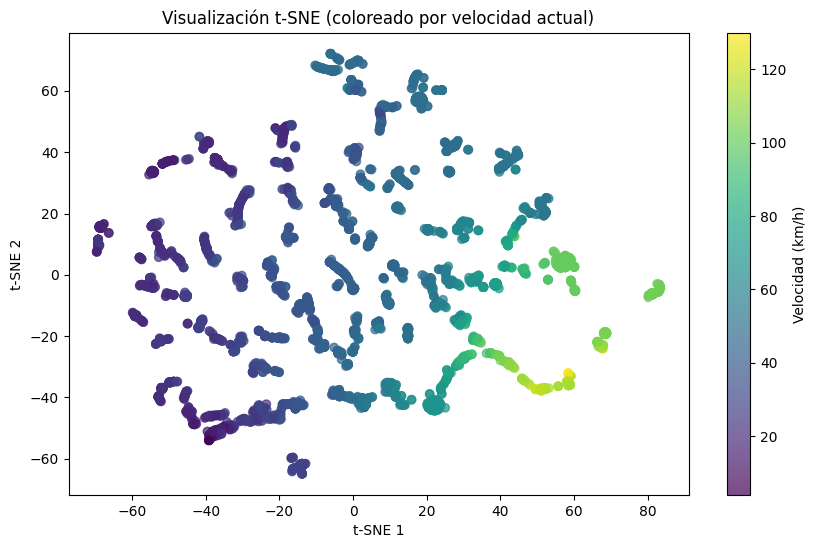

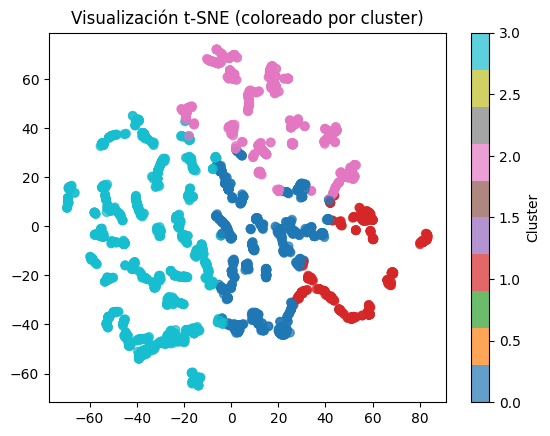

In [38]:
# Aplicar t-SNE para visualización en 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df_filtered['currentSpeed'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Velocidad (km/h)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualización t-SNE (coloreado por velocidad actual)")
plt.show()

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df_filtered['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Visualización t-SNE (coloreado por cluster)")
plt.show()